# Homework 1   Yige Wang

# 1. Clustering

### Data generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_dataset_00():
    Centers = [
        (0,0),
        (1,1),
        (2,1),
        (1,3)
    ]
    Centers = np.array(Centers)
    Points = []
    for center in Centers:
        var = np.array([[1,.5], [0,2]])
        Points.append(
            np.random.multivariate_normal(
                center,
                0.05*var,
                100
            )
        )
    Points = np.vstack(Points)
    return Points

In [3]:
Points_1 = create_dataset_00()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  app.launch_new_instance()


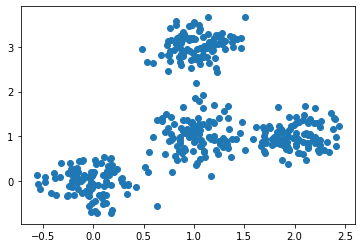

In [4]:
plt.scatter(Points_1[:,0], Points_1[:,1])
plt.show()

In [5]:
from random import random
def create_dataset_01():
    def line0(x):
        return (x, 10 - x**2 + (random() - 0.5))
    Points = []
    for _ in range(1000):
        x = 5*(random() - 0.5)
        point = line0(x)
        Points.append(point)
        
    def line1(x):
        return (x, 5*random() +((x)*(x-8)) + 5 )
    
    for _ in range(1000):
        x = 5*(random()+.1)
        point = line1(x)
        Points.append(point)
    
    Points = np.array(Points)
    return np.vstack(
        [
            Points, 
            np.random.multivariate_normal((5,5), [[1,0],[0,1]],100)
        ])

In [6]:
Points_2 = create_dataset_01()

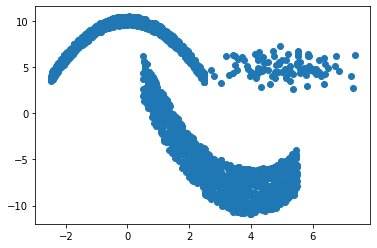

In [7]:
plt.scatter(Points_2[:,0], Points_2[:,1])
plt.show()

### KMeans

In [8]:
from random import random
from sklearn.cluster import KMeans

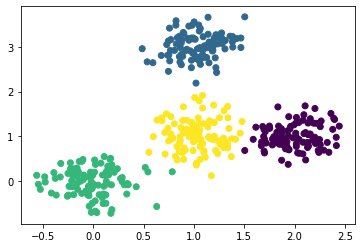

In [9]:
kmeans_model = KMeans(n_clusters=4)
pred_1 = kmeans_model.fit_predict(Points_1)
plt.scatter(Points_1[:, 0], Points_1[:, 1], c=pred_1)
plt.show()

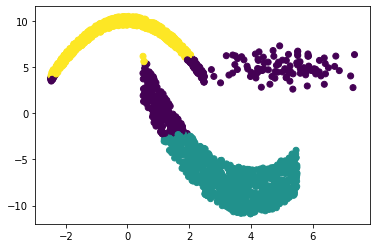

In [10]:
kmeans_model = KMeans(n_clusters=3)
pred_2 = kmeans_model.fit_predict(Points_2)
plt.scatter(Points_2[:, 0], Points_2[:, 1], c=pred_2)
plt.show()

### DBScan

In [11]:
from sklearn.cluster import  DBSCAN

Estimated number of clusters: 3
Estimated number of noise points: 11


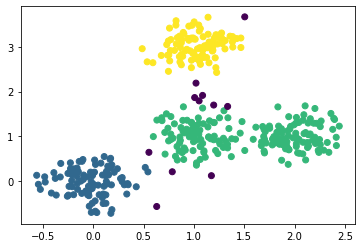

In [12]:
db = DBSCAN(eps=0.3, min_samples=19).fit(Points_1)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

plt.scatter(Points_1[:, 0], Points_1[:, 1], c=db.labels_)
plt.show()

Estimated number of clusters: 3
Estimated number of noise points: 48


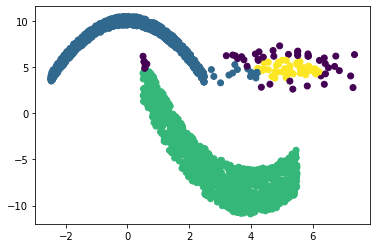

In [13]:
db = DBSCAN(eps=1, min_samples=35).fit(Points_2)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

plt.scatter(Points_2[:, 0], Points_2[:, 1], c=db.labels_)
plt.show()

### Spectral Clustering

In [14]:
from sklearn.cluster import SpectralClustering

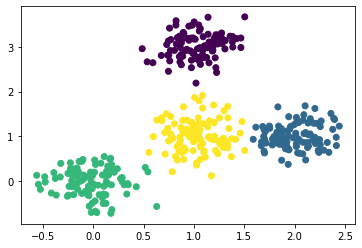

In [15]:
sc = SpectralClustering(n_clusters=4,
         assign_labels="discretize",
         random_state=0).fit(Points_1)
plt.scatter(Points_1[:, 0], Points_1[:, 1], c=sc.labels_)
plt.show()

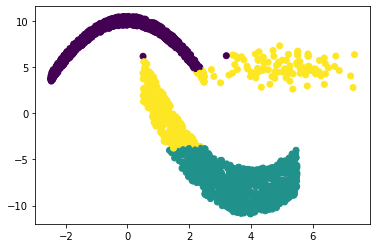

In [16]:
sc = SpectralClustering(n_clusters=3,
         assign_labels="discretize",
         random_state=0).fit(Points_2)
plt.scatter(Points_2[:, 0], Points_2[:, 1], c=sc.labels_)
plt.show()

### OPTICS

In [17]:
from sklearn.cluster import OPTICS

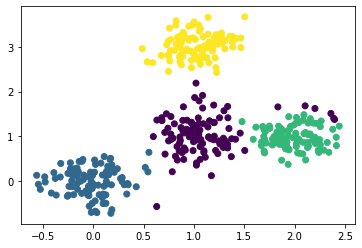

In [18]:
clust = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05)
clust.fit(Points_1)
plt.scatter(Points_1[:, 0], Points_1[:, 1], c=clust.labels_)
plt.show()

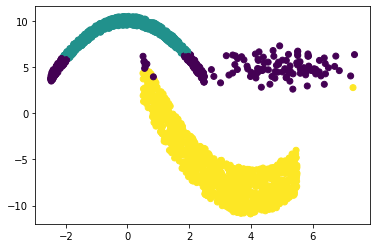

In [19]:
clust = OPTICS(min_samples=40, xi=.05, min_cluster_size=.05)
clust.fit(Points_2)
plt.scatter(Points_2[:, 0], Points_2[:, 1], c=clust.labels_)
plt.show()

# 2. TensorFlow Classifier

In [20]:
import tensorflow as tf
from tensorflow import keras

### Data preparation

In [21]:
test_data_1 = np.array([Points_1[i,:] for i in range(400) if i%3 == 2])
train_data_1 = np.array([Points_1[i,:] for i in range(400) if i%3 == 0 or i%3 ==1])
test_label_1 = np.array([pred_1[i] for i in range(400) if i%3 == 2])
train_label_1 = np.array( [pred_1[i] for i in range(400) if i%3 == 0 or i%3 ==1])

In [22]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [23]:
test_data_1 = sigmoid(test_data_1)
train_data_1 = sigmoid(train_data_1)

test_data_1 = test_data_1.reshape(133,2,1)
train_data_1 = train_data_1.reshape(267,2,1)

In [24]:
test_data_2 = np.array([Points_2[i,:] for i in range(2100) if i%3 == 2])
train_data_2 = np.array([Points_2[i,:] for i in range(2100) if i%3 == 0 or i%3 ==1])
test_label_2 = np.array([pred_2[i] for i in range(2100) if i%3 == 2])
train_label_2 = np.array( [pred_2[i] for i in range(2100) if i%3 == 0 or i%3 ==1])

In [25]:
test_data_2 = sigmoid(test_data_2)
train_data_2 = sigmoid(train_data_2)

test_data_2 = test_data_2.reshape(700,2,1)
train_data_2 = train_data_2.reshape(1400,2,1)

### First Dataset

In [26]:
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

W0925 19:23:30.943850 4449363392 deprecation.py:506] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [27]:
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
result_1 = model_1.fit(train_data_1, train_label_1, epochs=200)

Epoch 1/200
267/267 [==============================] - 0s 337us/sample - loss: 2.2836 - acc: 0.2097
Epoch 2/200
267/267 [==============================] - 0s 35us/sample - loss: 2.1687 - acc: 0.2434
Epoch 3/200
267/267 [==============================] - 0s 42us/sample - loss: 2.0644 - acc: 0.3071
Epoch 4/200
267/267 [==============================] - 0s 50us/sample - loss: 1.9642 - acc: 0.2547
Epoch 5/200
267/267 [==============================] - 0s 72us/sample - loss: 1.8679 - acc: 0.2547
Epoch 6/200
267/267 [==============================] - 0s 63us/sample - loss: 1.7779 - acc: 0.2547
Epoch 7/200
267/267 [==============================] - 0s 67us/sample - loss: 1.6972 - acc: 0.2547
Epoch 8/200
267/267 [==============================] - 0s 38us/sample - loss: 1.6279 - acc: 0.2547
Epoch 9/200
267/267 [==============================] - 0s 50us/sample - loss: 1.5710 - acc: 0.2547
Epoch 10/200
267/267 [==============================] - 0s 49us/sample - loss: 1.5242 - acc: 0.2547
Epoch 11

267/267 [==============================] - 0s 32us/sample - loss: 0.7053 - acc: 0.8202
Epoch 84/200
267/267 [==============================] - 0s 31us/sample - loss: 0.6970 - acc: 0.8052
Epoch 85/200
267/267 [==============================] - 0s 35us/sample - loss: 0.6891 - acc: 0.7865
Epoch 86/200
267/267 [==============================] - 0s 40us/sample - loss: 0.6818 - acc: 0.8090
Epoch 87/200
267/267 [==============================] - 0s 33us/sample - loss: 0.6730 - acc: 0.8539
Epoch 88/200
267/267 [==============================] - 0s 30us/sample - loss: 0.6646 - acc: 0.8652
Epoch 89/200
267/267 [==============================] - 0s 31us/sample - loss: 0.6569 - acc: 0.8502
Epoch 90/200
267/267 [==============================] - 0s 36us/sample - loss: 0.6497 - acc: 0.8315
Epoch 91/200
267/267 [==============================] - 0s 52us/sample - loss: 0.6425 - acc: 0.8464
Epoch 92/200
267/267 [==============================] - 0s 39us/sample - loss: 0.6353 - acc: 0.8577
Epoch 93/200


267/267 [==============================] - 0s 40us/sample - loss: 0.3403 - acc: 0.9476
Epoch 165/200
267/267 [==============================] - 0s 31us/sample - loss: 0.3378 - acc: 0.9476
Epoch 166/200
267/267 [==============================] - 0s 32us/sample - loss: 0.3363 - acc: 0.9551
Epoch 167/200
267/267 [==============================] - 0s 31us/sample - loss: 0.3331 - acc: 0.9588
Epoch 168/200
267/267 [==============================] - 0s 50us/sample - loss: 0.3308 - acc: 0.9476
Epoch 169/200
267/267 [==============================] - 0s 32us/sample - loss: 0.3289 - acc: 0.9476
Epoch 170/200
267/267 [==============================] - 0s 31us/sample - loss: 0.3268 - acc: 0.9476
Epoch 171/200
267/267 [==============================] - 0s 30us/sample - loss: 0.3238 - acc: 0.9551
Epoch 172/200
267/267 [==============================] - 0s 30us/sample - loss: 0.3221 - acc: 0.9588
Epoch 173/200
267/267 [==============================] - 0s 41us/sample - loss: 0.3199 - acc: 0.9513
Epoc

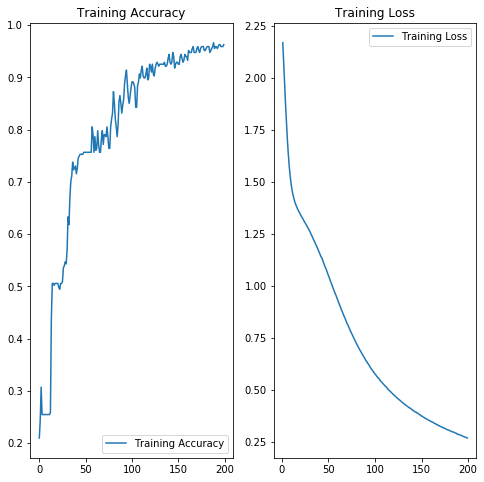

In [29]:
epochs = 200

acc = result_1.history['acc']

loss = result_1.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range[1:], loss[1:], label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [30]:
test_loss, test_acc = model_1.evaluate(test_data_1, test_label_1)

print('\nTest accuracy:', test_acc)

133/133 [==============================] - 0s 231us/sample - loss: 0.2816 - acc: 0.9699

Test accuracy: 0.9699248


In [31]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [32]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
result_2 = model_2.fit(train_data_2, train_label_2, epochs=200)

Epoch 1/200
1400/1400 [==============================] - 0s 70us/sample - loss: 2.0218 - acc: 0.4400
Epoch 2/200
1400/1400 [==============================] - 0s 37us/sample - loss: 1.3214 - acc: 0.7779
Epoch 3/200
1400/1400 [==============================] - 0s 35us/sample - loss: 0.8172 - acc: 0.8021
Epoch 4/200
1400/1400 [==============================] - 0s 33us/sample - loss: 0.5937 - acc: 0.8021
Epoch 5/200
1400/1400 [==============================] - 0s 33us/sample - loss: 0.4841 - acc: 0.8029
Epoch 6/200
1400/1400 [==============================] - 0s 35us/sample - loss: 0.4226 - acc: 0.8121
Epoch 7/200
1400/1400 [==============================] - 0s 35us/sample - loss: 0.3832 - acc: 0.8236
Epoch 8/200
1400/1400 [==============================] - 0s 35us/sample - loss: 0.3558 - acc: 0.8500
Epoch 9/200
1400/1400 [==============================] - 0s 36us/sample - loss: 0.3351 - acc: 0.8764
Epoch 10/200
1400/1400 [==============================] - 0s 37us/sample - loss: 0.3191 - a

1400/1400 [==============================] - 0s 31us/sample - loss: 0.1760 - acc: 0.9443
Epoch 82/200
1400/1400 [==============================] - 0s 36us/sample - loss: 0.1747 - acc: 0.9350
Epoch 83/200
1400/1400 [==============================] - 0s 41us/sample - loss: 0.1762 - acc: 0.9371
Epoch 84/200
1400/1400 [==============================] - 0s 34us/sample - loss: 0.1739 - acc: 0.9393
Epoch 85/200
1400/1400 [==============================] - 0s 28us/sample - loss: 0.1766 - acc: 0.9379
Epoch 86/200
1400/1400 [==============================] - 0s 28us/sample - loss: 0.1747 - acc: 0.9400
Epoch 87/200
1400/1400 [==============================] - 0s 29us/sample - loss: 0.1735 - acc: 0.9393
Epoch 88/200
1400/1400 [==============================] - 0s 28us/sample - loss: 0.1736 - acc: 0.9400
Epoch 89/200
1400/1400 [==============================] - 0s 28us/sample - loss: 0.1731 - acc: 0.9379
Epoch 90/200
1400/1400 [==============================] - 0s 30us/sample - loss: 0.1727 - acc: 

1400/1400 [==============================] - 0s 22us/sample - loss: 0.1537 - acc: 0.9529
Epoch 161/200
1400/1400 [==============================] - 0s 22us/sample - loss: 0.1520 - acc: 0.9471
Epoch 162/200
1400/1400 [==============================] - 0s 22us/sample - loss: 0.1520 - acc: 0.9464
Epoch 163/200
1400/1400 [==============================] - 0s 22us/sample - loss: 0.1560 - acc: 0.9479
Epoch 164/200
1400/1400 [==============================] - 0s 25us/sample - loss: 0.1522 - acc: 0.9443
Epoch 165/200
1400/1400 [==============================] - 0s 33us/sample - loss: 0.1511 - acc: 0.9486
Epoch 166/200
1400/1400 [==============================] - 0s 28us/sample - loss: 0.1517 - acc: 0.9493
Epoch 167/200
1400/1400 [==============================] - 0s 28us/sample - loss: 0.1512 - acc: 0.9507
Epoch 168/200
1400/1400 [==============================] - 0s 28us/sample - loss: 0.1513 - acc: 0.9507
Epoch 169/200
1400/1400 [==============================] - 0s 26us/sample - loss: 0.151

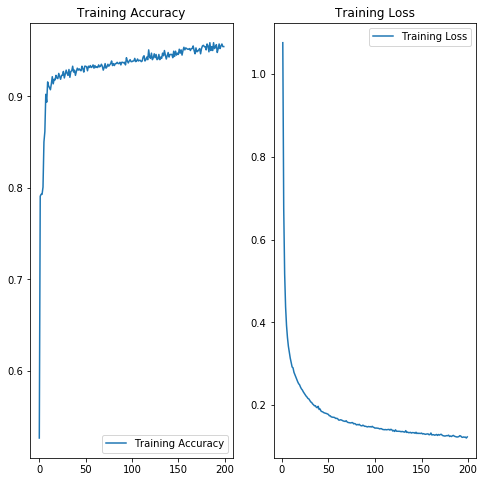

In [38]:
epochs = 200

acc = result_2.history['acc']

loss = result_2.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range[1:], loss[1:], label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [37]:
test_loss, test_acc = model_2.evaluate(test_data_2, test_label_2)

print('\nTest accuracy:', test_acc)

700/700 [==============================] - 0s 221us/sample - loss: 0.1564 - acc: 0.9300

Test accuracy: 0.93


In [40]:
model_1.save('model_1.h5')

In [41]:
model_2.save('model_2.h5')